<a href="https://colab.research.google.com/github/9624345868/OIBSIP_DataScience_Task1/blob/main/project_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("car data.csv")

In [ ]:
print("Shape of Data:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Data: (301, 9)

Columns: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

First 5 Rows:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Sell

In [ ]:
df["Car_Name"] = df["Car_Name"].apply(lambda x: x.split(" ")[0])

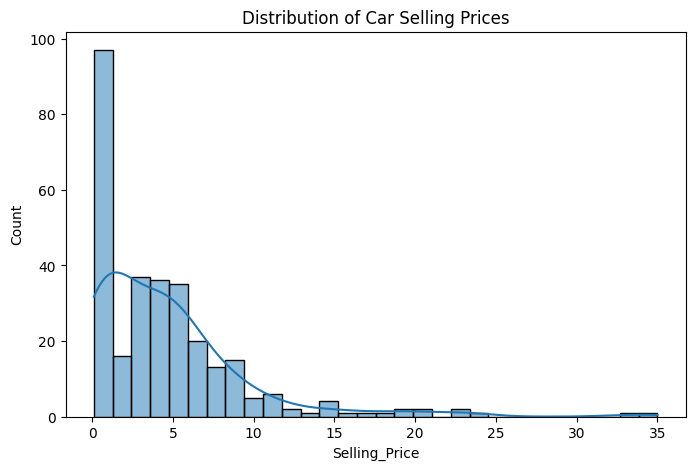

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.title("Distribution of Car Selling Prices")
plt.show()


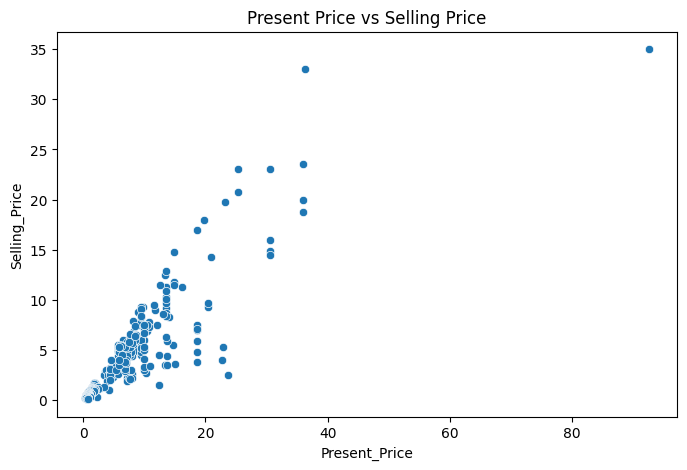

In [ ]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title("Present Price vs Selling Price")
plt.show()

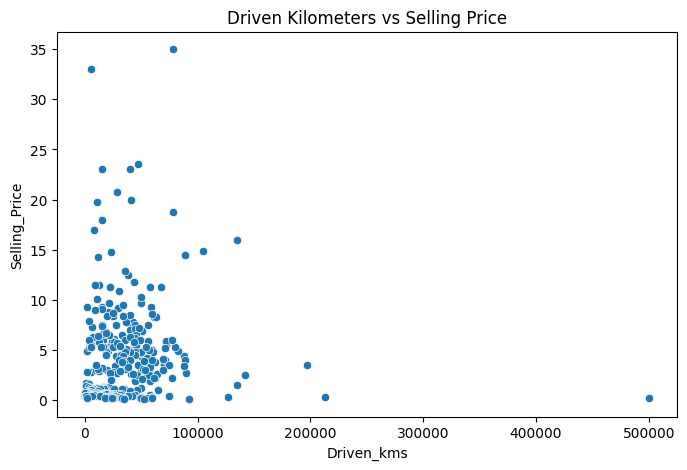

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title("Driven Kilometers vs Selling Price")
plt.show()

In [ ]:
cat_cols = ['Fuel_Type','Selling_type','Transmission']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


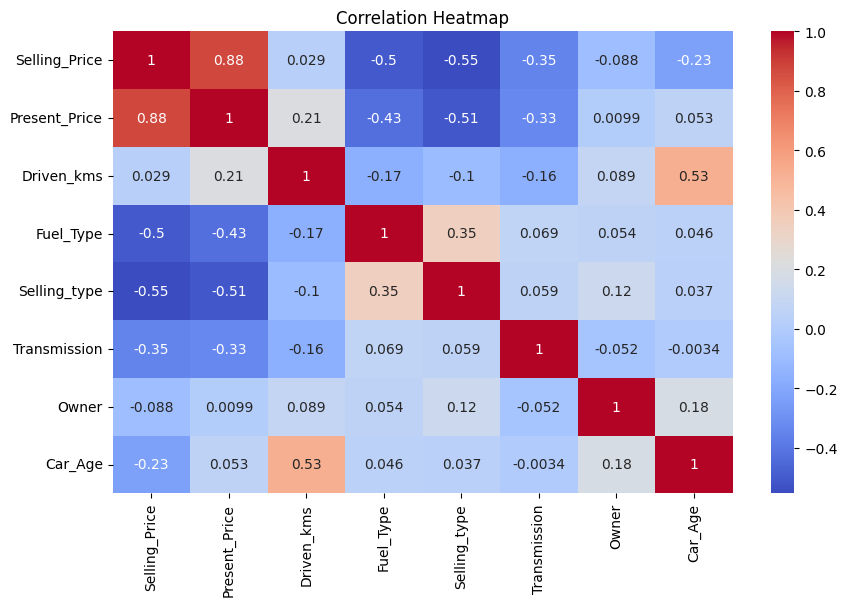

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Model Evaluation ---")
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))



--- Model Evaluation ---
Linear Regression R2: 0.7409934356413543
Random Forest R2: 0.5671822030397908
Linear Regression RMSE: 2.5836880811143303
Random Forest RMSE: 3.339929127316926


In [ ]:
print(df.columns.tolist())


['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age']


In [ ]:
print("Summary Statistics:\n", df.describe())
print(f"\nMaximum Selling Price: {df['Selling_Price'].max()} Lakhs")
print(f"Minimum Selling Price: {df['Selling_Price'].min()} Lakhs")
print(f"Average Selling Price: {df['Selling_Price'].mean():.2f} Lakhs")

Summary Statistics:
        Selling_Price  Present_Price     Driven_kms   Fuel_Type  Selling_type  \
count     299.000000     299.000000     299.000000  299.000000    299.000000   
mean        4.589632       7.541037   36916.752508    1.792642      0.354515   
std         4.984240       8.566332   39015.170352    0.422297      0.479168   
min         0.100000       0.320000     500.000000    0.000000      0.000000   
25%         0.850000       1.200000   15000.000000    2.000000      0.000000   
50%         3.510000       6.100000   32000.000000    2.000000      0.000000   
75%         6.000000       9.840000   48883.500000    2.000000      1.000000   
max        35.000000      92.600000  500000.000000    2.000000      1.000000   

       Transmission       Owner     Car_Age  
count    299.000000  299.000000  299.000000  
mean       0.869565    0.043478   11.384615  
std        0.337346    0.248720    2.896868  
min        0.000000    0.000000    7.000000  
25%        1.000000    0.000

In [ ]:
fuel_avg = df.groupby("Fuel_Type")["Selling_Price"].mean()
highest_fuel = fuel_avg.idxmax()
lowest_fuel = fuel_avg.idxmin()

print(f"🔴 Highest Avg Car Price by Fuel: {highest_fuel} ({fuel_avg.max():.2f} lakhs)")
print(f"🟢 Lowest Avg Car Price by Fuel: {lowest_fuel} ({fuel_avg.min():.2f} lakhs)")

🔴 Highest Avg Car Price by Fuel: 1 (10.10 lakhs)
🟢 Lowest Avg Car Price by Fuel: 0 (3.10 lakhs)


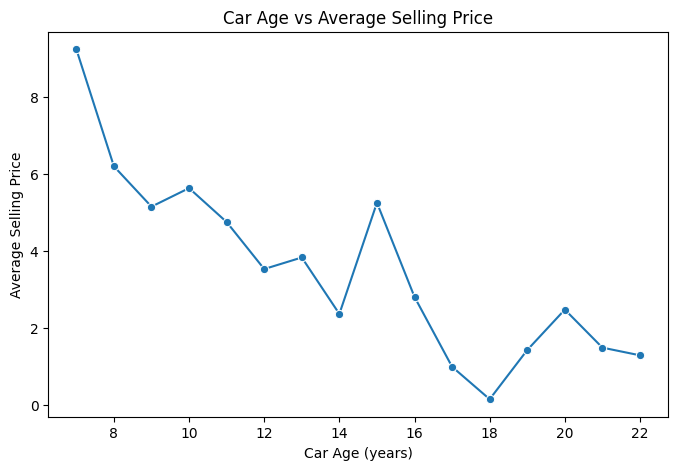

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=age_avg.index, y=age_avg.values, marker="o")
plt.title("Car Age vs Average Selling Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Average Selling Price")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

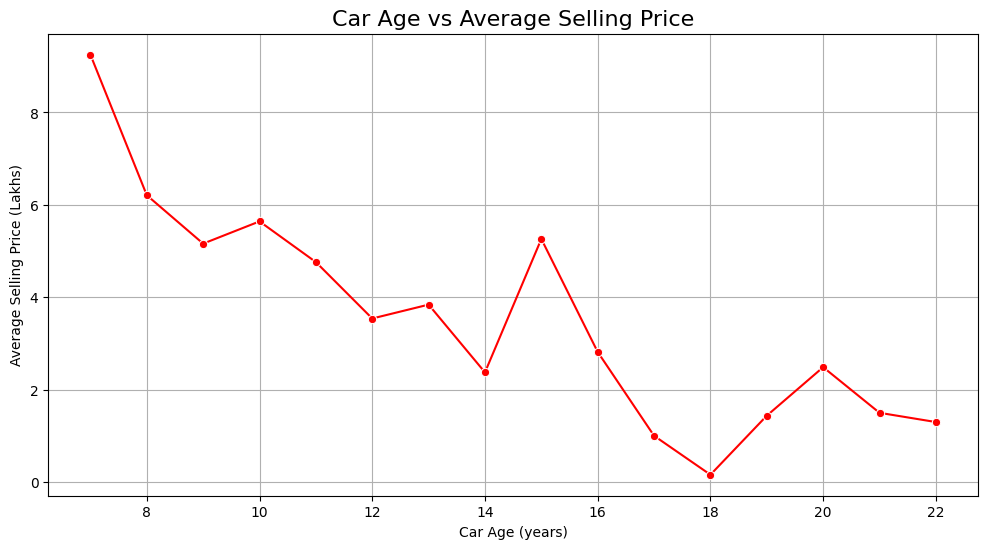

In [ ]:
age_trend = df.groupby("Car_Age")["Selling_Price"].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=age_trend.index, y=age_trend.values, color="red", marker="o")
plt.title("Car Age vs Average Selling Price", fontsize=16)
plt.xlabel("Car Age (years)")
plt.ylabel("Average Selling Price (Lakhs)")
plt.grid(True)
plt.show

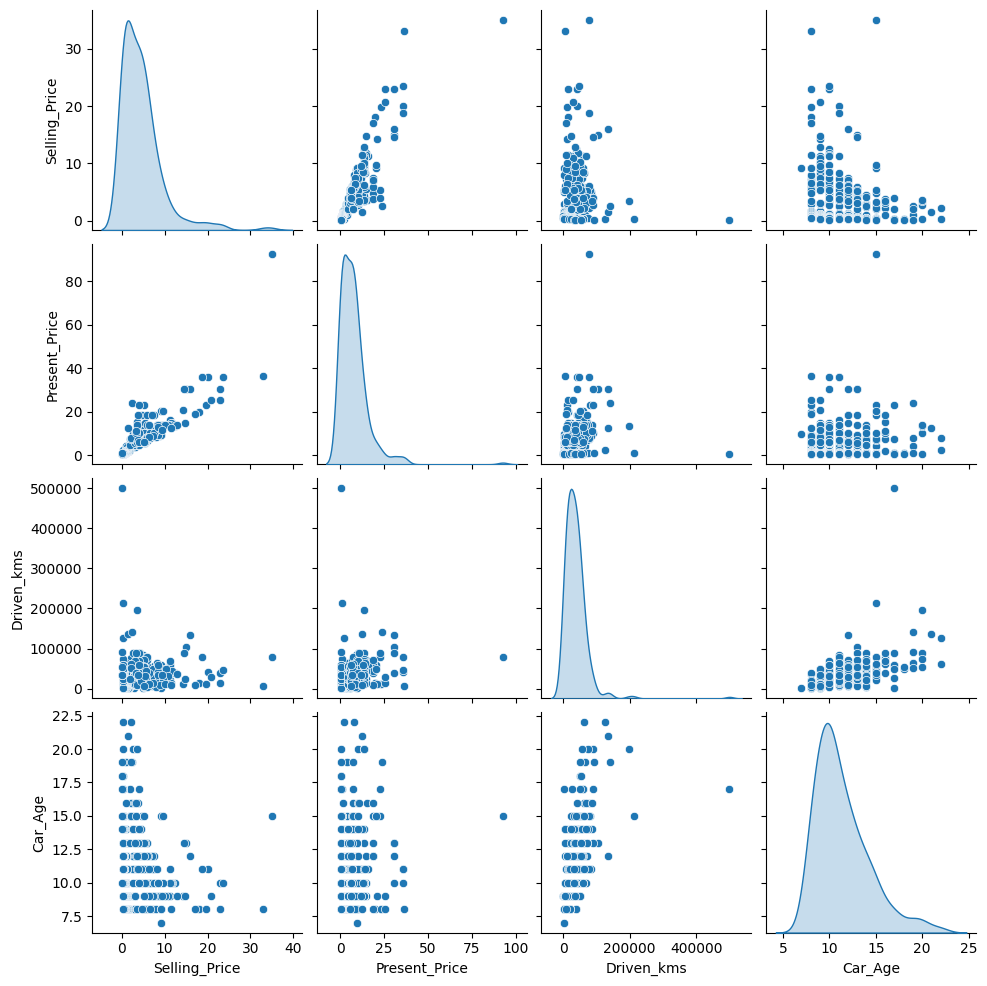

In [ ]:
sns.pairplot(df[['Selling_Price','Present_Price','Driven_kms','Car_Age']], diag_kind="kde")
plt.show()


/tmp/ipython-input-925778286.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


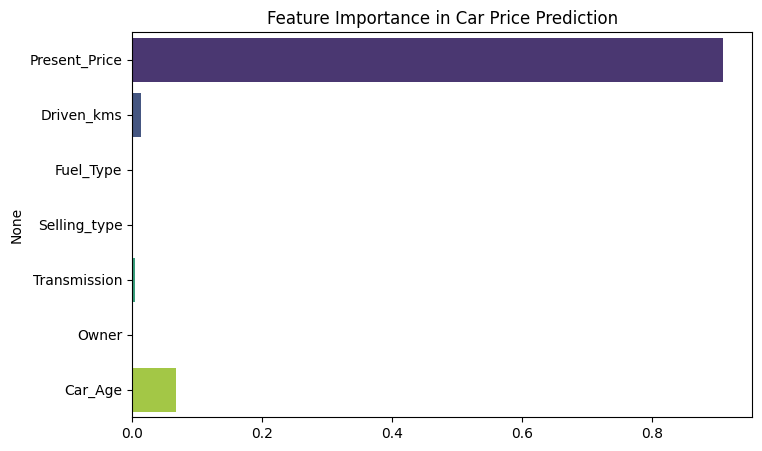

In [ ]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance in Car Price Prediction")
plt.show()

/tmp/ipython-input-513996565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Fuel_Type", data=df, palette="Set1")


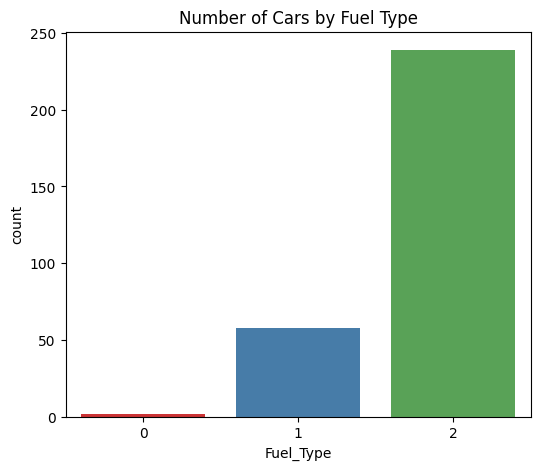

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Fuel_Type", data=df, palette="Set1")
plt.title("Number of Cars by Fuel Type")
plt.show()


In [ ]:
print("Rows & Columns:", df.shape)
print("Columns:", df.columns.tolist())


Rows & Columns: (299, 8)
Columns: ['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age']


In [ ]:
#ex
new_car = pd.DataFrame({
    "Present_Price": [8],
    "Driven_kms": [30000],
    "Owner": [0],
    "Car_Age": [4],
    "Fuel_Type": [1],
    "Selling_type": [0],
    "Transmission": [1]
})

new_car = new_car[X.columns]

new_car_scaled = scaler.transform(new_car)

predicted_price = rf.predict(new_car_scaled)
print("\n🚗 Predicted Price of New Car:", round(predicted_price[0], 2), "Lakhs")



🚗 Predicted Price of New Car: 5.99 Lakhs
